
# Table of Contents


$\;\;\;$ 1. [Data Selection](#data_selection)<br>
$\;\;\;\;\;\;$ 1.1. [Import libraries](#libraries)<br>
$\;\;\;\;\;\;$ 1.2. [Load data](#load_data)<br>
$\;\;\;$ 2. [Data Processing](#data_processing)<br>
$\;\;\;\;\;\;$ 2.1. [Casting types of variables](#casting)<br>
$\;\;\;\;\;\;$ 2.2. [Check missing values](#missing)<br>
$\;\;\;\;\;\;$ 2.3. [Exploratory analysis](#exploratory)<br>
$\;\;\;\;\;\;$ 2.4. [Processing and selecting features](#select_features)<br>
$\;\;\;\;\;\;\;\;\;$ 2.4.1. [Quantitative features](#select_quantitatives)<br>
$\;\;\;\;\;\;\;\;\;$ 1.4.2. [Qualitarive features](#select_qualitatives)<br>
$\;\;\;$ 3. [Data transformation](#data_transformation)<br>
$\;\;\;\;\;\;$ 3.1. [Opponents](#opponent)<br>
$\;\;\;\;\;\;$ 3.2. [Time](#time)<br>
$\;\;\;\;\;\;$ 3.3. [Date](#date)<br>
$\;\;\;\;\;\;$ 3.4. [One hot encoding](#hot_encoding)<br>
$\;\;\;$ 4. [Data Mining](#modelling)<br>
$\;\;\;\;\;\;$ 4.1. [Splitting data](#splitting)<br>
$\;\;\;\;\;\;$ 4.2. [Scaler](#scaler)<br>
$\;\;\;\;\;\;$ 4.3. [Feature selecion](#feat_sel)<br>
$\;\;\;\;\;\;$ 4.4. [First modelling](#first)<br>
$\;\;\;\;\;\;$ 4.5. [Second modelling](#second)<br>
$\;\;\;$ 5. [Predictions](#prediction)<br>
$\;\;\;$ 6. [Anexo](#anexo)<br>




# 1. Data Selection

<a id='data_selection'></a>

# 1.1. Import libraries

<a id='libraries'></a>

In [1]:
import time
import pandas as pd
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
%matplotlib inline

from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectPercentile, RFE, RFECV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

# 1.2. Load data

<a id='load_data'></a>

In [2]:
df = pd.read_csv("./../data/data.csv", header=0, index_col="shot_id", parse_dates=['game_date'])
print("Size of data loaded:", len(df))

df.head()

Size of data loaded: 30697


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
2,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
3,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
4,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
5,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR


# 2. Data Processing

<a id='data_processing'></a>

## 2.1. Casting types of variables

<a id='casting'></a>

In [3]:
df.dtypes

action_type                   object
combined_shot_type            object
game_event_id                  int64
game_id                        int64
lat                          float64
loc_x                          int64
loc_y                          int64
lon                          float64
minutes_remaining              int64
period                         int64
playoffs                       int64
season                        object
seconds_remaining              int64
shot_distance                  int64
shot_made_flag               float64
shot_type                     object
shot_zone_area                object
shot_zone_basic               object
shot_zone_range               object
team_id                        int64
team_name                     object
game_date             datetime64[ns]
matchup                       object
opponent                      object
dtype: object

In [4]:
df["period"] = df["period"].astype('category')
df["season"] = df["season"].astype('category')
df["team_id"] = df["team_id"].astype('category')
df["game_id"] = df["game_id"].astype('category')
df["opponent"] = df["opponent"].astype('category')
df["playoffs"] = df["playoffs"].astype('category')
df["shot_type"] = df["shot_type"].astype('category')
df["action_type"] = df["action_type"].astype('category')
df["game_event_id"] = df["game_event_id"].astype('category')
df["shot_zone_area"] = df["shot_zone_area"].astype('category')
df["shot_zone_basic"] = df["shot_zone_basic"].astype('category')
df["shot_zone_range"] = df["shot_zone_range"].astype('category')
df["combined_shot_type"] = df["combined_shot_type"].astype('category')

## 2.2. Check missing values

<a id='missing'></a>

In [5]:
df.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
dtype: int64

## 2.3. Exploratory analysis

<a id='exploratory'></a>

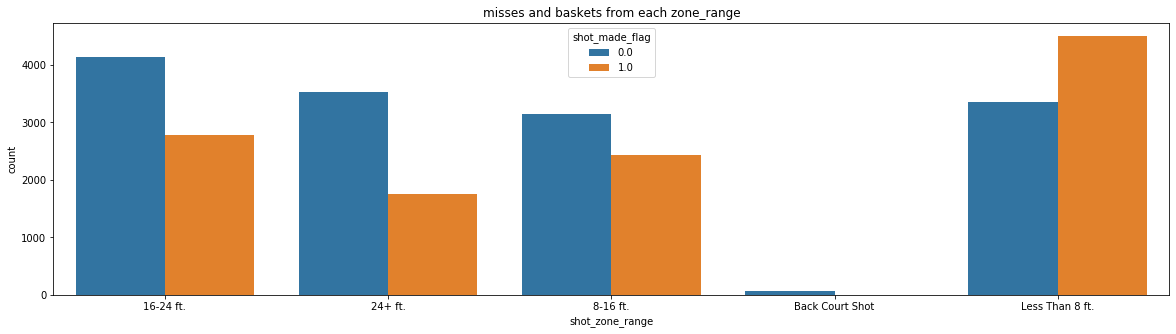

In [6]:
plt.figure(figsize=(20,5))
sns.countplot('shot_zone_range',hue='shot_made_flag',data=df[df.shot_made_flag.notnull()])
plt.title('misses and baskets from each zone_range')
plt.show()

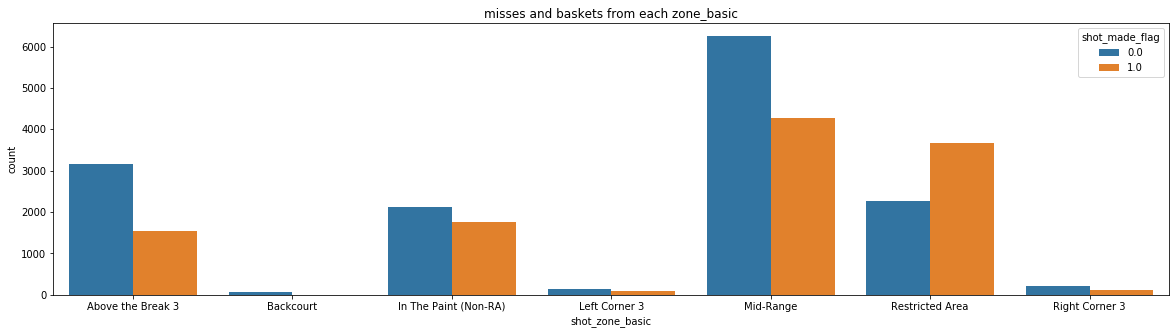

In [7]:
plt.figure(figsize=(20,5))
sns.countplot('shot_zone_basic',hue='shot_made_flag',data=df[df.shot_made_flag.notnull()])
plt.title('misses and baskets from each zone_basic')
plt.show()

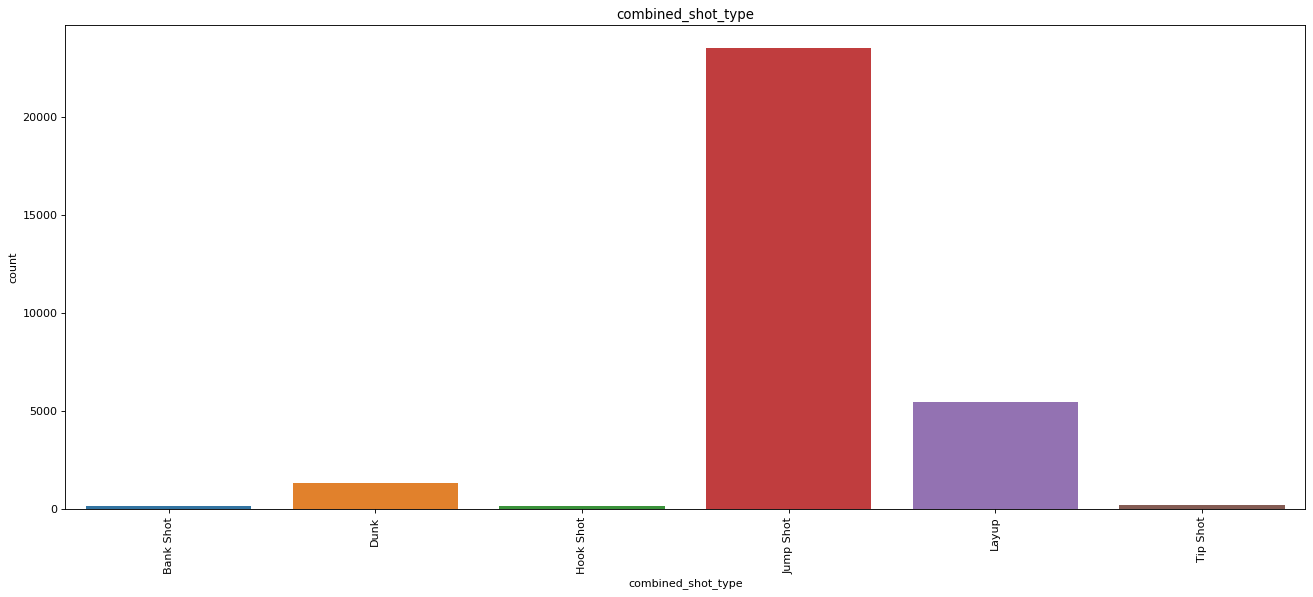

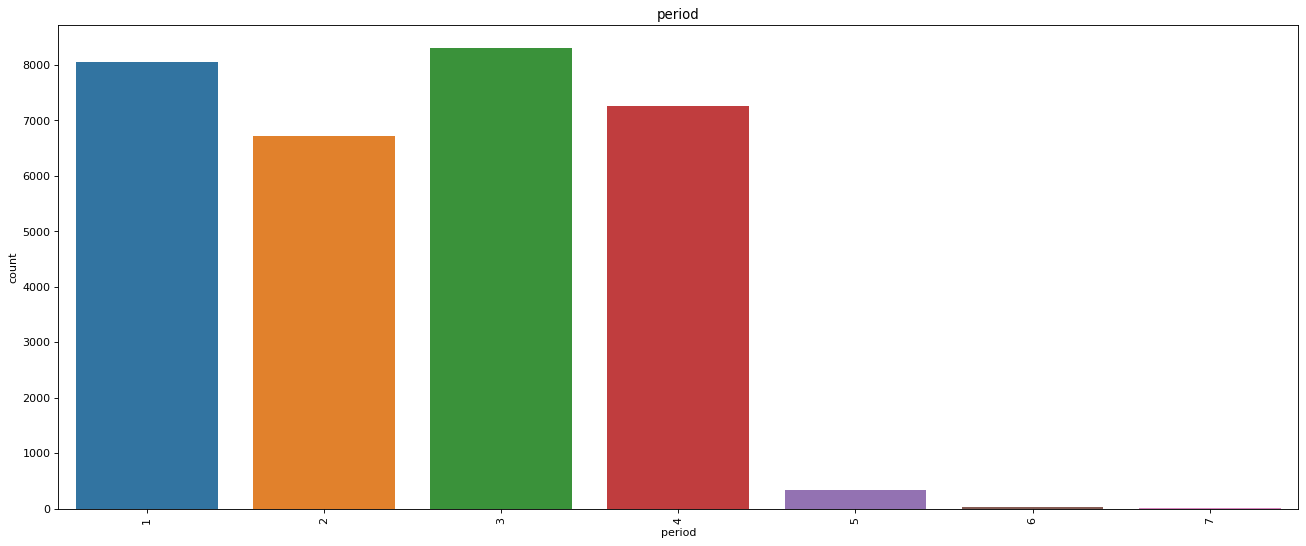

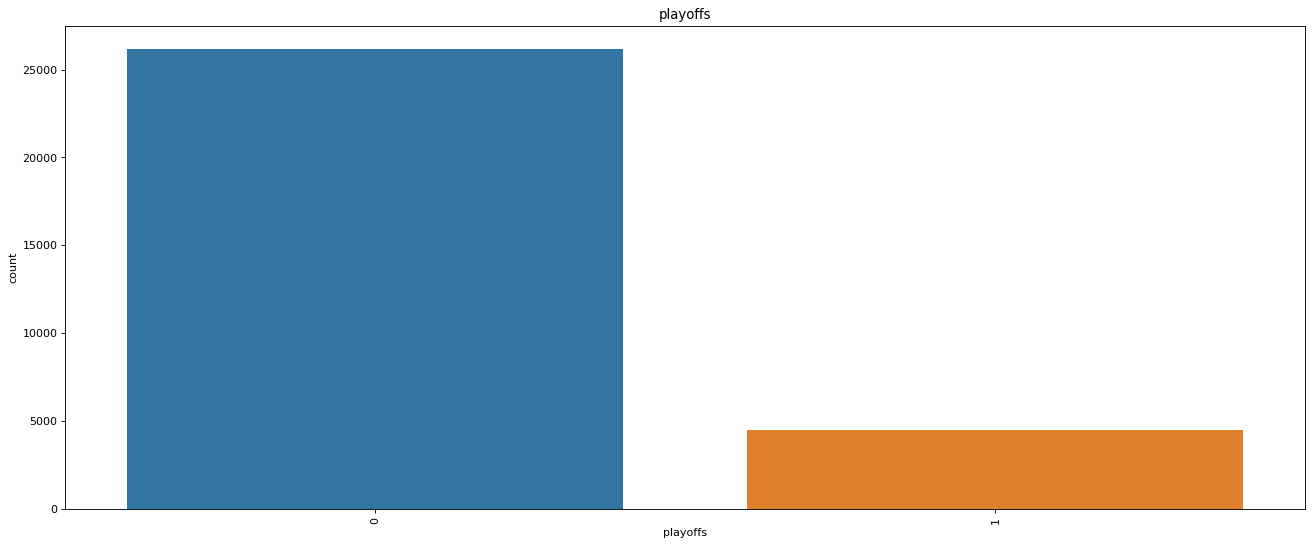

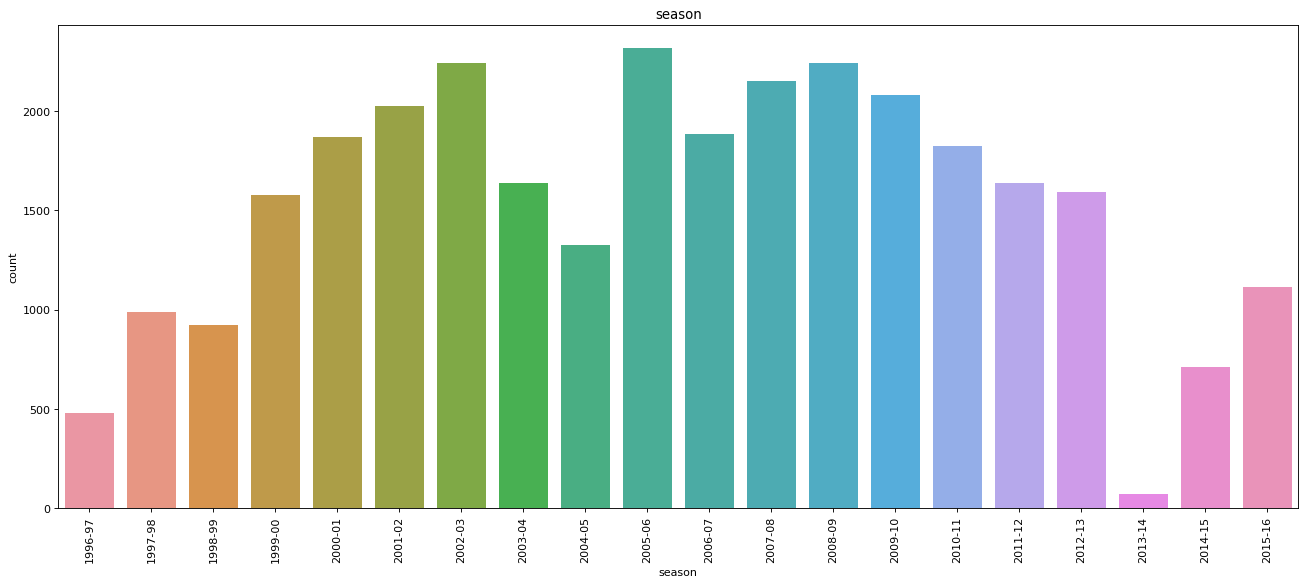

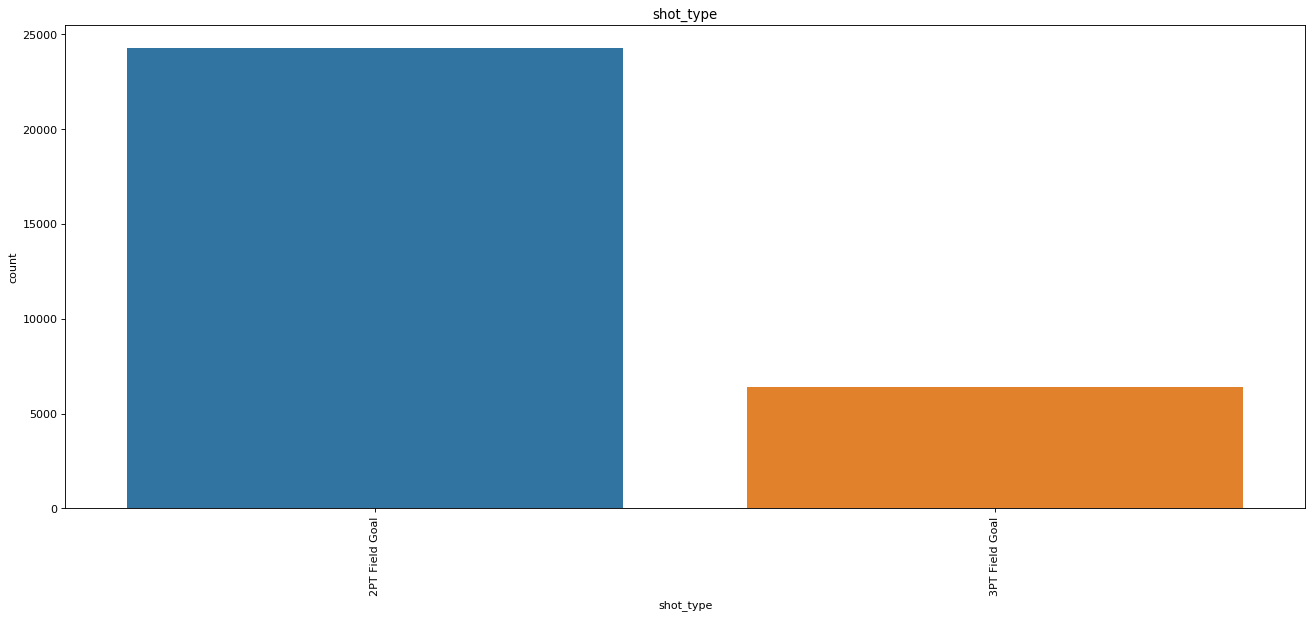

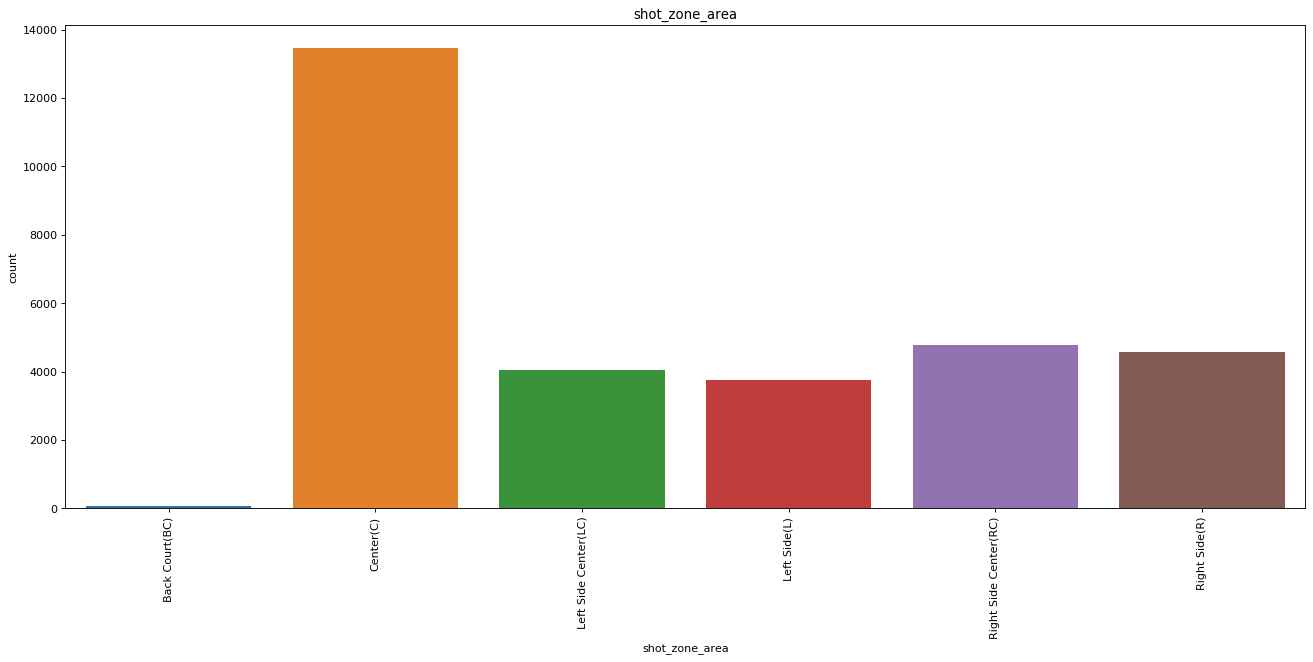

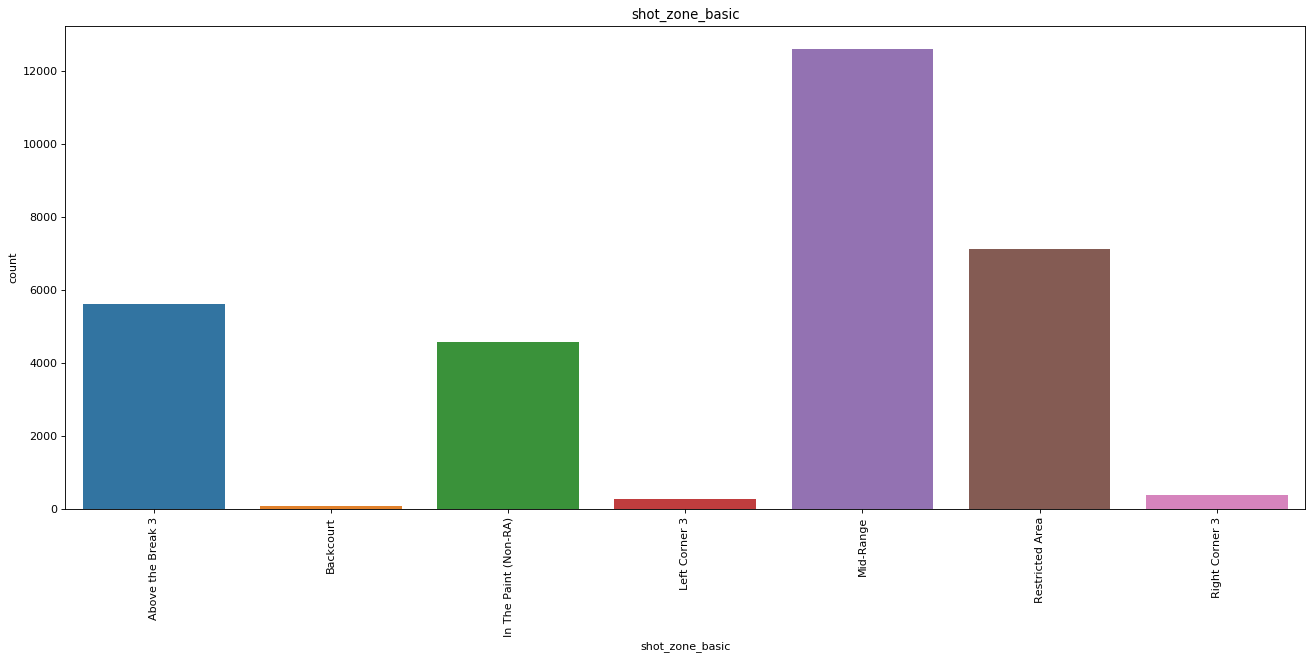

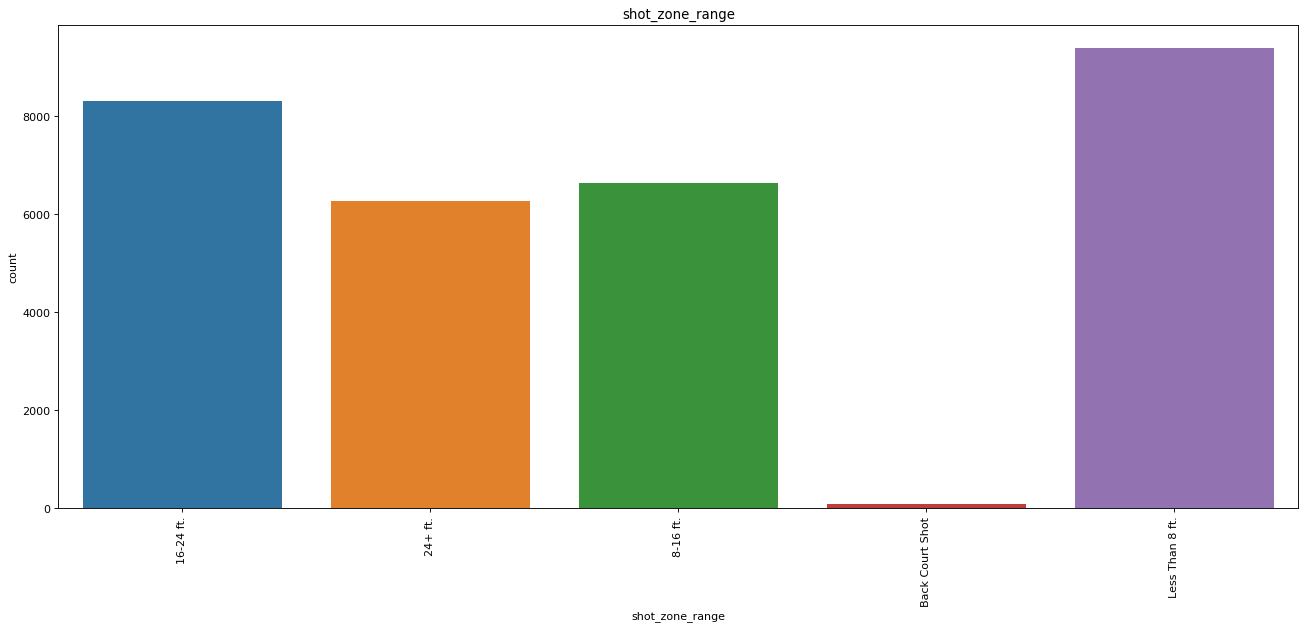

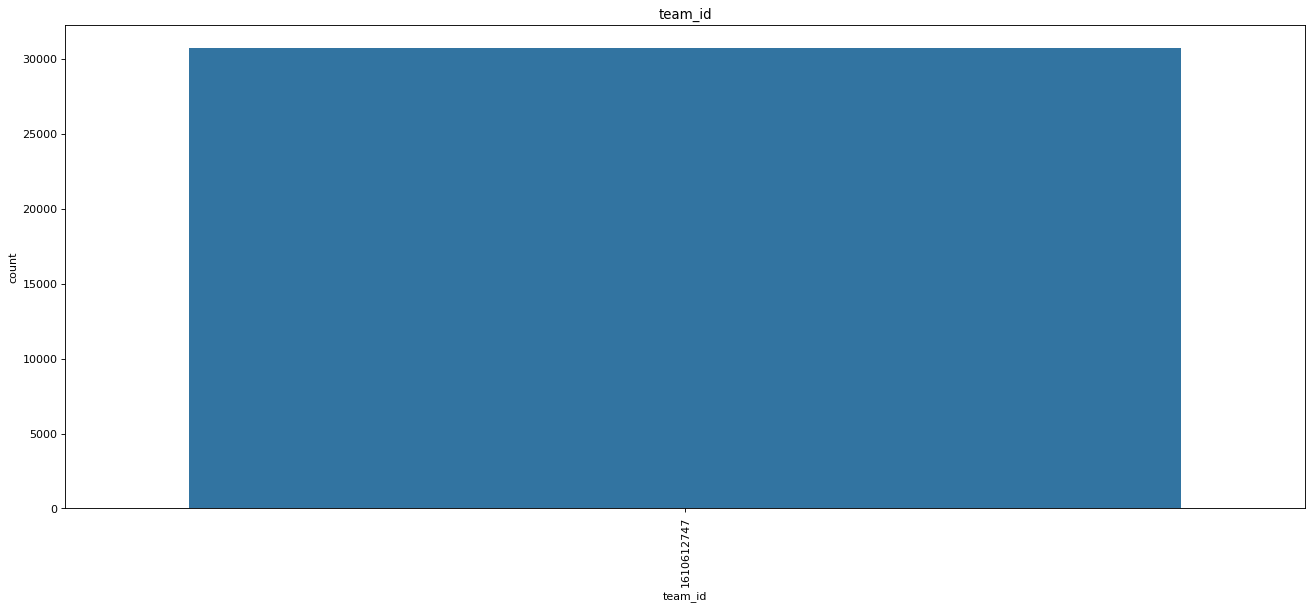

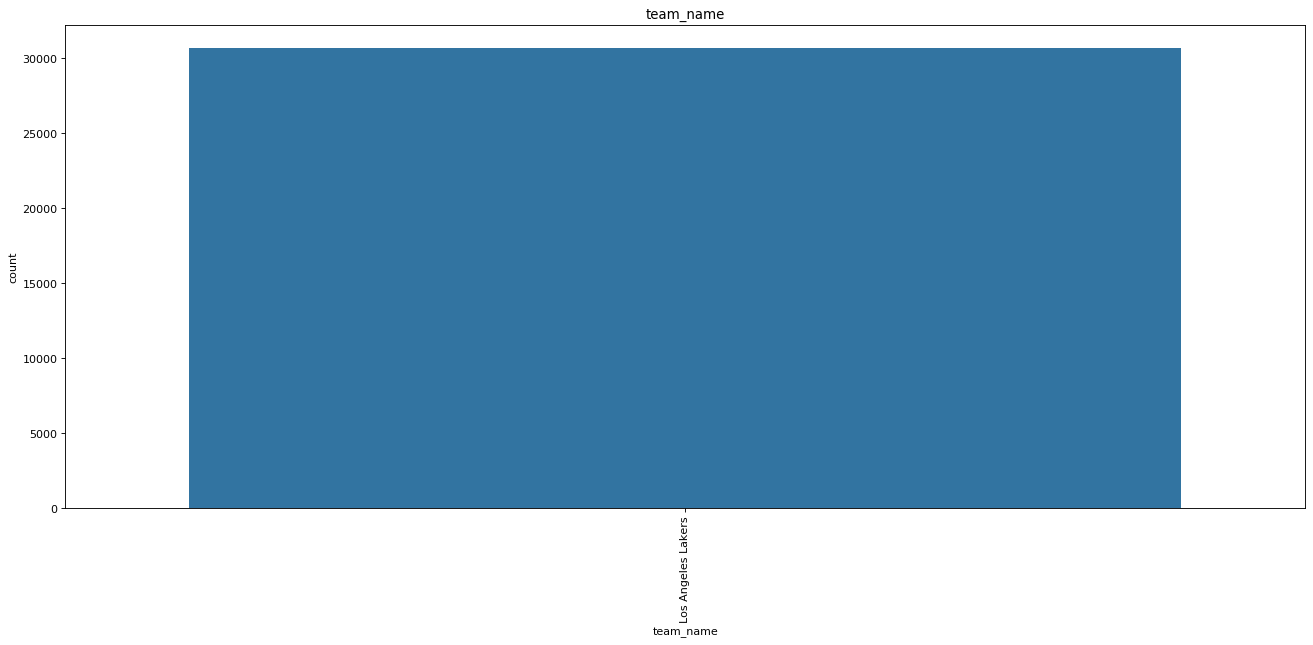

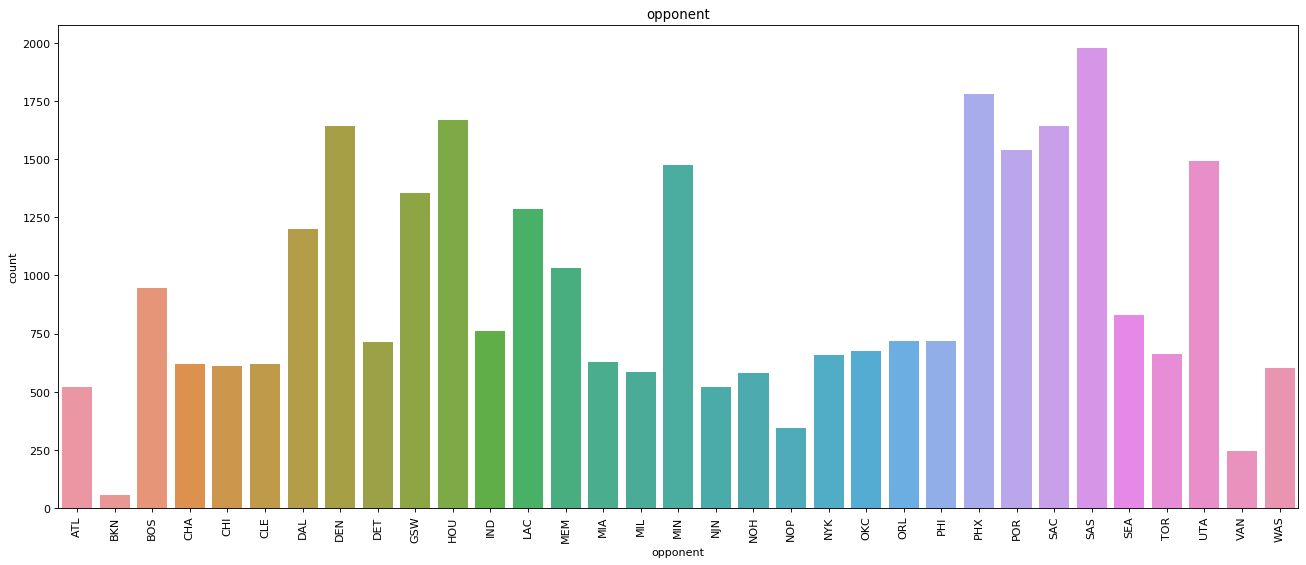

In [8]:
cols = ["combined_shot_type", "period", "playoffs", "season", "shot_type", "shot_zone_area", "shot_zone_basic", "shot_zone_range", "team_id", "team_name", "opponent"]

for c in cols:
    plt.figure(figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
    ax = plt.axes()
    sns.countplot(x=c, data=df, ax=ax);
    ax.set_title(c)
    plt.xticks(rotation=90)
    plt.show()

# 2.4. Processing and selecting features

<a id='select_features'> </a>

# 2.4.1. Quantitative features

<a id='select_quantitatives'> </a>

Comenzaremos el análisis de nuestras características por las variables cuantitativas. En este sentido, vamos a analizar la correlación que existe entre cada una de esas variables con el fin de poder descartar alguna de ellas si es que poseen alta correlación. Esto es importante para posteriormente no introducir información redundante a la hora de entrenar nuestro modelo.

### Matrix correlation

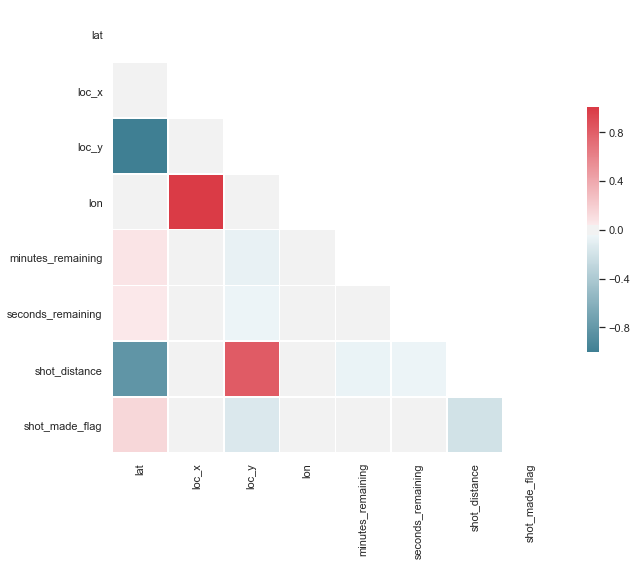

In [9]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Nos encontramos que tenemos dos pares de variables que están completamente correlacionadas entre sí, lon-loc_x y lat-loc_y. Con el fin de no introducir información redundante en nuestro modelo, procederemos a eliminar de nuestro conjunto de datos dichas variables.

### Drop continuous variables

In [10]:
print("Pearson correlation between lat and loc_y variables: %.2f" % pearsonr(df.lat, df.loc_y)[0])
df.drop('lat', axis=1, inplace=True)

print("Pearson correlation between lon and loc_x variables: %.2f" % pearsonr(df.lon, df.loc_x)[0])
df.drop('lon', axis=1, inplace=True)

Pearson correlation between lat and loc_y variables: -1.00
Pearson correlation between lon and loc_x variables: 1.00


# 2.4.2. Qualitative features

<a id='select_qualitatives'> </a>

En cuanto a las variables cualitativas, como no podemos estudiar la correlacion de Pearson, vamos a indagar en como están distribuidos los valores en cada variables con el fin de encontrar la forma de disminuir el número de variables.

In [11]:
df.describe(include=['object', 'category'])

,action_type,combined_shot_type,game_event_id,game_id,period,playoffs,season,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,matchup,opponent
count,30697,30697,30697,30697,30697,30697,30697,30697,30697,30697,30697,30697,30697,30697,30697
unique,57,6,620,1559,7,2,20,2,6,7,5,1,1,74,33
top,Jump Shot,Jump Shot,2,21501228,3,0,2005-06,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,1610612747,Los Angeles Lakers,LAL @ SAS,SAS
freq,18880,23485,132,50,8296,26198,2318,24271,13455,12625,9398,30697,30697,1020,1978


Como vemos, existen algunas variables que solo cuentan con un único valor. A fines prácticos, poco podrá aprender nuestro modelo de este tipo de caracteristicas.

In [12]:
print("Different values for team_name variable", set(df.team_name))
df.drop('team_name', axis=1, inplace=True)

print("Different values for team_id variable", set(df.team_id))
df.drop('team_id', axis=1, inplace=True)

df.drop('game_event_id', axis=1, inplace=True)
df.drop('game_id', axis=1, inplace=True)

Different values for team_name variable {'Los Angeles Lakers'}
Different values for team_id variable {1610612747}


Las variables con las que contamos hasta el momento son tanto binarias como multietiqueta. No parecen presentar demasiado problema a priori, salvo que quizá tengamos que discretizarlas numéricamente más adelante. La única variable categórica que no esta incluida en las gráficas anteriores es 'action_type'. Tendremos que examinarla con mas detalle, ya que cuenta con 57 etiquetas diferentes.

In [13]:
df[["action_type", "combined_shot_type"]].head(25)

,action_type,combined_shot_type
shot_id,,
1,Jump Shot,Jump Shot
2,Jump Shot,Jump Shot
3,Jump Shot,Jump Shot
4,Jump Shot,Jump Shot
5,Driving Dunk Shot,Dunk
6,Jump Shot,Jump Shot
7,Layup Shot,Layup
8,Jump Shot,Jump Shot
9,Jump Shot,Jump Shot


In [14]:
print("Uniques values for action_type:",format(str(len(set(df.action_type)))))
print("Uniques values for combined_shot_type:",format(str(len(set(df.combined_shot_type)))))

Uniques values for action_type: 57
Uniques values for combined_shot_type: 6


Como podemos ver en esta tabla que tenemos encima, parece que la variable 'action_type' aporta mas granularidad aun sobre la variable 'combined_shot_type', es decir, va más aun al detalle. Al introducir tantas casúisticas diferentes, según el modelo que se utilice sería recomendable no usarla o tratar de preprocesarla.

In [15]:
#df.drop('action_type', axis=1, inplace=True)
df.head(1)

,action_type,combined_shot_type,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,167,72,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,LAL @ POR,POR


# 3. Data Transformation

<a id='data_transformation'></a>

## 3.1. Opponents

<a id='opponent'></a>

Se supone que los datos contenidos en la columna 'matchup' hacen referencia a los partidos que se disputaron entre Los Angeles Lakers y sus contrincantes. Esta columna nos denotaria únicamente cual es los dos equipos era local, ya que el oponente viene especificado nuevamente en la columna 'opponent'. De tal forma que los equipos contrarios deben ser los mismos en una columna y en otra. Veamos que pasa:

In [16]:
matchups = list(set(df.matchup.str[-3:]))
print("Number of teams by matches column:", len(matchups))
opponent = list(set(df.opponent))
print("Number of teams by opponent column:", len(opponent))

main_list = list(set(matchups).difference(opponent))
print("\nThere are", len(main_list), "teams incongruous:")
print(main_list)

Number of teams by matches column: 38
Number of teams by opponent column: 33

There are 5 teams incongruous:
['SAN', 'NOK', 'CHH', 'PHO', 'UTH']


Como vemos, existe una inconsistencia entre el número de equipos encontrados en una columna y en otra. Para avergiguar cual es la mejor solución, recurriremos a la web oficial de la NBA y comprobaremos cuales son las siglas reales para los equipos que participan en dicha competición.

In [17]:
df[df["matchup"].str.endswith(main_list[0])].head(2) # PHO == PHX --> Phoenix Suns
df[df["matchup"].str.endswith(main_list[1])].head(2) # SAN == SAS --> San Antonio Spurs
df[df["matchup"].str.endswith(main_list[2])].head(2) # CHH == CHA --> Charlotte Horets
df[df["matchup"].str.endswith(main_list[3])].head(2) # UTH == UTA --> Utah Jazz
df[df["matchup"].str.endswith(main_list[4])].head(2) # NOK == NOP --> New Orleans Pelicans https://stats.nba.com/game/0020500903/scoring/

,action_type,combined_shot_type,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,matchup,opponent
shot_id,,,,,,,,,,,,,,,,,,
6224,Running Jump Shot,Jump Shot,94,41,11,1,0,2004-05,46,10,0.0,2PT Field Goal,Right Side(R),Mid-Range,8-16 ft.,2004-11-03,LAL @ UTH,UTA
6225,Jump Shot,Jump Shot,-145,158,4,1,0,2004-05,40,21,0.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2004-11-03,LAL @ UTH,UTA


Se ha comprobado manualmente que la columna 'matchup' posee errores en las siglas usadas par denotar a los equipos, por lo que para saber con que equipo se enfrentaban los LAL, usaremos la columna 'opponent' y descartaremos 'matchup'. Sin embargo, antes de eliminarla vamos a crear una nueva columna a partir de ella en la que indiquemos con 1 LAL jugaba como local y con 0 si jugaba como visitante. Si vamos a esa columna, vemos que existen dos formatos para expresar el enfrentamiento, el simbolo '@' y el 'vs.'. Tras una serie de comprobaciones tales como: buscar en google 2006-03-26 Lakers vs. new orleans pelicans y ver que LAL jugaron en casa a la vez que en los datos se denoto con vs. Asimismo se ha comprobado con el encuentro 2000-10-31 lakers vs partland, donde LAL jugó como visitante y en nuestros datos aparece con un @. Finalmente la logica será, si aparece '@' en dicha columna, asigno un 0, si aparece un 'vs.', asigno un 1.

In [18]:
df["home"] = pd.np.where(df.matchup.str.contains("@"), 0, 1)
df["home"] = df["home"].astype('category')
df.drop('matchup', axis=1, inplace=True)

## 3.2. Time

<a id='time'></a>

Otra de las variables que parecen estar muy relacionadas entre si son 'minutes_remaining' y 'seconds_remaining'. en lugar de tener ambas por separado, al deberse cada una de ellas a espacios temporales relacionados, podemos tratar de aunarlas en una sola. Por ejemplo de la siguiente forma: 

In [19]:
df['remain_time'] = df['seconds_remaining'] + df['minutes_remaining']*60
df.drop('minutes_remaining', axis=1, inplace=True)
df.drop('seconds_remaining', axis=1, inplace=True)

In [20]:
df.head()

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,game_date,opponent,home,remain_time
shot_id,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,167,72,1,0,2000-01,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,2000-10-31,POR,0,627
2,Jump Shot,Jump Shot,-157,0,1,0,2000-01,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,2000-10-31,POR,0,622
3,Jump Shot,Jump Shot,-101,135,1,0,2000-01,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,2000-10-31,POR,0,465
4,Jump Shot,Jump Shot,138,175,1,0,2000-01,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,2000-10-31,POR,0,412
5,Driving Dunk Shot,Dunk,0,0,2,0,2000-01,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,2000-10-31,POR,0,379


## 3.3. Date

<a id='date'></a>

In [21]:
df['year'] = df.game_date.dt.year
df['month'] = df.game_date.dt.month
df['day'] = df.game_date.dt.day

In [22]:
df.drop('game_date', axis=1, inplace=True)

In [23]:
df.head(5)

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent,home,remain_time,year,month,day
shot_id,,,,,,,,,,,,,,,,,,,
1,Jump Shot,Jump Shot,167,72,1,0,2000-01,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,POR,0,627,2000,10,31
2,Jump Shot,Jump Shot,-157,0,1,0,2000-01,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR,0,622,2000,10,31
3,Jump Shot,Jump Shot,-101,135,1,0,2000-01,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR,0,465,2000,10,31
4,Jump Shot,Jump Shot,138,175,1,0,2000-01,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR,0,412,2000,10,31
5,Driving Dunk Shot,Dunk,0,0,2,0,2000-01,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR,0,379,2000,10,31


## 3.4. One hot encoding

<a id='hot_encoding'></a>

Un paso fundamental que debemos realizar es el realizar un 'encoding' sobre las variables categoricas. La mayoria de algoritmos trabajan mejor con variables numéricas. La idea de esta técnica se basa en, dada una variable predictora que puede tomar n valores distintos, generaremos a partir de ella un vector de n dimensiones, cada una de ellas correspondiente a los posibles valores. De forma que si para una instancia, esta variable predictora tomaba un valor "X", entonces el vector estará completamente relleno de ceros, excepto en la posicion de la columna "X".

In [24]:
categorial_cols = df.select_dtypes(include='category').columns

for cc in categorial_cols:
    dummies = pd.get_dummies(df[cc])
    dummies = dummies.add_prefix("{}#".format(cc))
    df.drop(cc, axis=1, inplace=True)
    df = df.join(dummies)


El resultado obtenido, debe ser un dataframe que solo contenga variables predictoras numéricas.

In [25]:
df.head(1)

,loc_x,loc_y,shot_distance,shot_made_flag,remain_time,year,month,day,action_type#Alley Oop Dunk Shot,action_type#Alley Oop Layup shot,...,opponent#POR,opponent#SAC,opponent#SAS,opponent#SEA,opponent#TOR,opponent#UTA,opponent#VAN,opponent#WAS,home#0,home#1
shot_id,,,,,,,,,,,,,,,,,,,,,
1,167,72,18,NaN,627,2000,10,31,0,0,...,1,0,0,0,0,0,0,0,1,0


# 4. Data Mining

<a id='modelling'></a>

En primer lugar vamos a dividir todo el conjunto de datos en dos. Por un lado, los datos que nos servirán para realizar el aprendizaje supervisado, es decir, aquellos registros para los cuales tenemos el valor de la variable objetivo. Por otro, los registros a los que aplicaremos nuestro modelo predictivo y enviaremos a Kaggle.

## 4.1. Splitting data

<a id='splitting'></a>

In [26]:
# Splitting data into train-test
data = df[~df.shot_made_flag.isna()]
submit = df[df.shot_made_flag.isna()]

print("Split dataframe into data-submit: Data:", len(data), "; Submit:", len(submit))
print("\nPercentage for every class:\n", data.shot_made_flag.value_counts()/len(data))

Split dataframe into data-submit: Data: 25697 ; Submit: 5000

Percentage for every class:
 0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64


Vemos como de balanceada esta la clase a predecir:

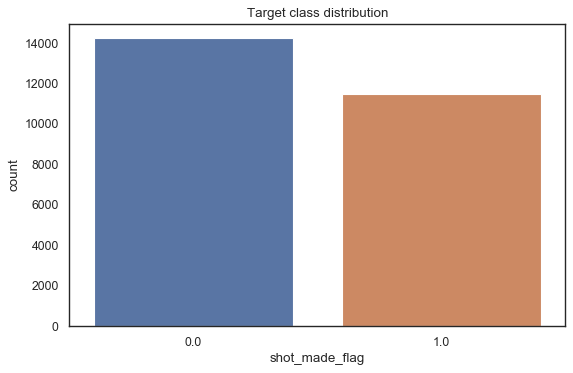

In [27]:
plt.figure(figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes()
sns.countplot(x='shot_made_flag', data=data, ax=ax);
ax.set_title('Target class distribution')
plt.show()

Hemos querido realizar un print tanto del número de registros que han sido repartidos a cada conjunto, como del porcentaje de elementos de cada clase. A pesar de que hemos obtenido que un 55% de las instancias pertenecen a la clase 0 y un 45% a la clase 0, es decir, los porcentajes son bastante similares, cuando dividamos nuestro conjunto de datos en train-test, intentaremos mantener las mismas proporciones.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    data.loc[:, data.columns != 'shot_made_flag'], data.shot_made_flag, 
    test_size=0.2, random_state=0, stratify=data.shot_made_flag)

print("Split data into train-test:\nTrain:", len(X_train), "\nTest:", len(X_test),"\n\n")

print("Percentage for train set:\n",y_train.value_counts()/len(y_train),"\n")
print("Percentage for train set:\n",y_test.value_counts()/len(y_test))

Split data into train-test:
Train: 20557 
Test: 5140 


Percentage for train set:
 0.0    0.553826
1.0    0.446174
Name: shot_made_flag, dtype: float64 

Percentage for train set:
 0.0    0.553891
1.0    0.446109
Name: shot_made_flag, dtype: float64


Como vemos, hemos dividido nuestros datos en conjunto de entrenamiento y de validacion manteniendo las proporciones de clase originales.

## 4.2. Scaler data

<a id='scaler'></a>

Implementaremos un método que escale los datos aplicando la diferencia el mínimo y cada punto del dataset, dividiendo eso por el rango.

In [29]:
#sc = StandardScaler()
sc = MinMaxScaler()

X_train_sc = pd.DataFrame(sc.fit_transform(X_train.values), 
                          index=X_train.index, 
                          columns=X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test.values), 
                          index=X_test.index, 
                          columns=X_test.columns)



In [30]:
X_train_sc

,loc_x,loc_y,shot_distance,remain_time,year,month,day,action_type#Alley Oop Dunk Shot,action_type#Alley Oop Layup shot,action_type#Cutting Finger Roll Layup Shot,...,opponent#POR,opponent#SAC,opponent#SAS,opponent#SEA,opponent#TOR,opponent#UTA,opponent#VAN,opponent#WAS,home#0,home#1
shot_id,,,,,,,,,,,,,,,,,,,,,
25198,0.451807,0.172455,0.126582,0.137255,0.15,1.000000,0.600000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
29555,0.257028,0.235928,0.240506,0.182073,0.75,0.272727,0.533333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10393,0.857430,0.037126,0.215190,0.145658,0.55,0.000000,0.466667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26396,0.508032,0.196407,0.151899,0.434174,0.25,0.363636,0.666667,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29587,0.502008,0.347305,0.303797,0.558824,0.75,0.272727,0.700000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15841,0.506024,0.263473,0.215190,0.865546,0.70,0.000000,0.700000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12276,0.534137,0.259880,0.215190,0.105042,0.60,0.000000,0.733333,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26738,0.351406,0.171257,0.151899,0.009804,0.30,0.363636,0.433333,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 4.3. Features selection

<a id='feat_sel'></a>

A la hora de entrenar nuestros modelos, puede ser computacionalmente muy complejo contar con mas de 150 variables. Es cierto que nuestro dataset no contiene demasiadas instancias, pero aun así es conveniente seleccionar las variables mas importantes.

### Gradient Boosting

In [31]:
# Create the RFE object and compute a cross-validated score.
ranker = GradientBoostingClassifier()
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=ranker, step=1, cv=StratifiedKFold(2), n_jobs = 1, scoring='neg_log_loss')
rfecv.fit(X_train_sc, y_train)

print("Optimal number of features based on Gradient Boosting : %d" % rfecv.n_features_)


Optimal number of features based on Gradient Boosting : 33


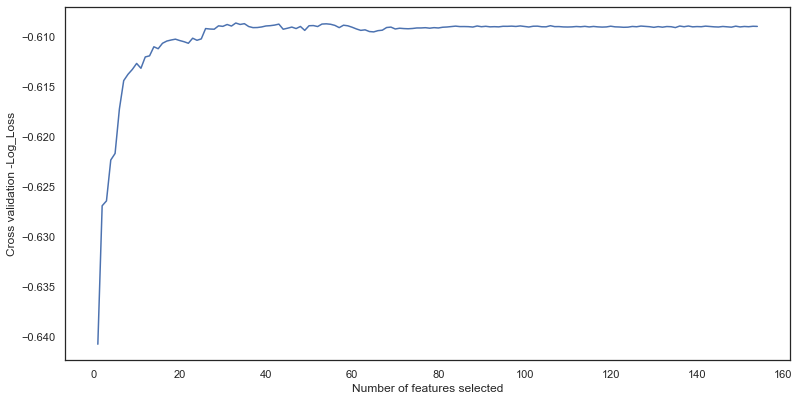

In [32]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(13, 6.5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation -Log_Loss")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [33]:
feature_names = X_train_sc.columns
selected_features_gb = feature_names[rfecv.support_].tolist()
selected_features_gb

print("\nNumber of main features by Linear Discriminant Analysis: {}\n".format(len(selected_features_gb)))
#selected_features_gb


Number of main features by Linear Discriminant Analysis: 33



### LDA

Optimal number of features based on LDA : 102


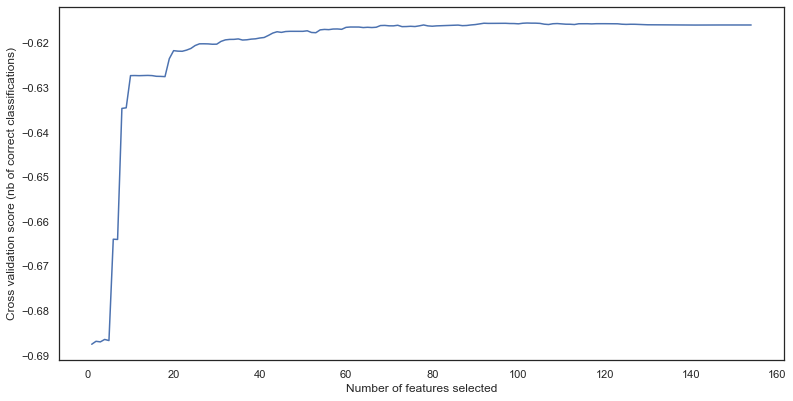

In [34]:
ranker = LinearDiscriminantAnalysis()
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=ranker, step=1, cv=StratifiedKFold(2), scoring='neg_log_loss')
rfecv.fit(X_train_sc, y_train)

print("Optimal number of features based on LDA : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(13, 6.5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [35]:
feature_names = X_train_sc.columns
selected_features_lda = feature_names[rfecv.support_].tolist()
selected_features_lda

print("\nNumber of main features by Linear Discriminant Analysis: {}\n".format(len(selected_features_lda)))


Number of main features by Linear Discriminant Analysis: 102



Hemos almacenado cuales han sido las variables mas relevantes aplicando este algoritmo. Probemos ahora cambiando el modelo, en este caso aplicando una regresión logística, y comparemos resultados.

### Logistic Regression

Optimal number of features based on Logistic Regression : 59


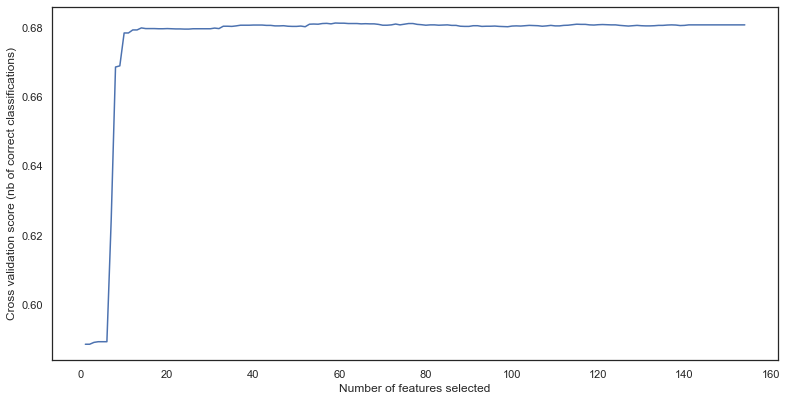

In [36]:
# Create the RFE object and compute a cross-validated score.
ranker = LogisticRegression()
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=ranker, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X_train_sc, y_train)

print("Optimal number of features based on Logistic Regression : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(13, 6.5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [37]:
feature_names = X_train_sc.columns
selected_features_lr = feature_names[rfecv.support_].tolist()

print("\nNumber of main features by Logistic regression: {}\n".format(len(selected_features_lr)))


Number of main features by Logistic regression: 59



## 4.4. First modelling

<a id='first'></a>

En este momento, toca implementar diferentes modelos y técnicas. Para ello, aplicaremos un cross validation con 5 folds para diferendes modelos y las principales variables.

Omitimos la seleccion de variables y mantenemos la variable ActionType

In [38]:
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle = True)

models = []
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(('Logistic regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Ada Boost', AdaBoostClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('XGBoost', XGBClassifier()))
models.append(("Bagging", BaggingClassifier()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("MLP", MLPClassifier()))
models.append(("Gauss", GaussianNB()))
models.append(("Voting", VotingClassifier(estimators=[
                                                    ('lr', GradientBoostingClassifier()), 
                                                    ('rf', AdaBoostClassifier()), 
                                                    ('xgb', XGBClassifier())], voting='soft')))



start_time = time.time()
# Evaluate each model in turn
results = []
names = []
stds = []
means =[]
for name, model in models:
    cv_results = cross_val_score(model, X_train_sc[selected_features_gb], y_train, cv=kfold, scoring='neg_log_loss', n_jobs=2)
    print("Cross validation results for {0}: {1}".format(name, cv_results))
    print("{0}: ({1:.4f}) +/- ({2:.4f})".format(name, cv_results.mean(), cv_results.std()),"\n")
    results.append(cv_results)
    names.append(name)
    stds.append(cv_results.std())
    means.append(abs(cv_results.mean()))
    
    
print("--- %s seconds ---" % (time.time() - start_time))

Cross validation results for LDA: [-0.6165658  -0.61842797 -0.60957788 -0.60925763 -0.61958528]
LDA: (-0.6147) +/- (0.0044) 

Cross validation results for Logistic regression: [-0.61148181 -0.61839252 -0.61179128 -0.61223575 -0.61088818]
Logistic regression: (-0.6130) +/- (0.0028) 

Cross validation results for Random Forest: [-1.13624247 -1.06658713 -1.07967572 -1.18720336 -1.05561313]
Random Forest: (-1.1051) +/- (0.0496) 

Cross validation results for Ada Boost: [-0.68826085 -0.68814194 -0.68795725 -0.68842507 -0.68821701]
Ada Boost: (-0.6882) +/- (0.0002) 

Cross validation results for Gradient Boosting: [-0.6138227  -0.601739   -0.59894866 -0.60116221 -0.61577966]
Gradient Boosting: (-0.6063) +/- (0.0070) 

Cross validation results for XGBoost: [-0.5984708  -0.60628126 -0.61397586 -0.60747818 -0.60150756]
XGBoost: (-0.6055) +/- (0.0053) 

Cross validation results for Bagging: [-1.11562001 -1.19896682 -1.22116249 -1.17816705 -1.20064933]
Bagging: (-1.1829) +/- (0.0363) 

Cross vali

In [39]:
pd.DataFrame({"Name":names, "Log Loss":means, "Standar Deviation": stds}).sort_values(by="Log Loss")

,Name,Log Loss,Standar Deviation
5,XGBoost,0.605543,0.005324
4,Gradient Boosting,0.606290,0.007038
1,Logistic regression,0.612958,0.002752
0,LDA,0.614683,0.004407
10,Voting,0.618977,0.002707
8,MLP,0.619355,0.009147
3,Ada Boost,0.688200,0.000153
2,Random Forest,1.105064,0.049577
6,Bagging,1.182913,0.036294
7,KNN,2.080829,0.070775


Los resultados mostrados son propios de mas de 10 modelos en los que hemos dejado por defecto los hiperparametros. Tiene sentido que habiendo seleccionado las mejores variables segun LDA y Linear Regression , sean dos de los modelos que mejores resultados obtienen. Pero no solo tenemos esos dos, si no también han obtenido muy buenos resultados Gradient Boosting y XGboots, ya que es una versión modificada del anterior. Lo que haremos ahora será, seleccionar esos 3 o 4 modelos mas importantes, y tratar de optimizar los hiperparametros.

## 4.5 Second modelling

<a id='second'></a>

Con el fin de no extendernos demasiado en el tiempo de computo, vamos a tratar de averiguar cuales son los mejores hiperparametros para este conjunto de datos y el algoritmo Gradient Boosting

### Learning rates

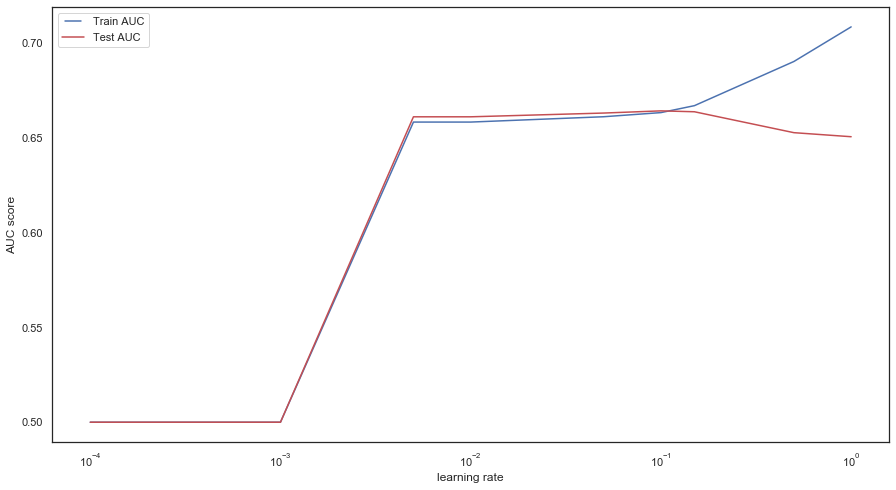

In [40]:
learning_rates = [0.0001, 0.001,0.005, 0.01, 0.05, 0.1, 0.15, 0.5, 1]
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingClassifier(learning_rate=eta)
    model.fit(X_train_sc[selected_features_gb], y_train)
    train_pred = model.predict(X_train_sc[selected_features_gb])
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test_sc[selected_features_gb])
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(15,8))
line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.xscale("log")
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

El mejor learing rate rondará el valor 0.05, ya que a partir de 0.1 el algoritmo empieza a cometer overfitting.

### Number estimators

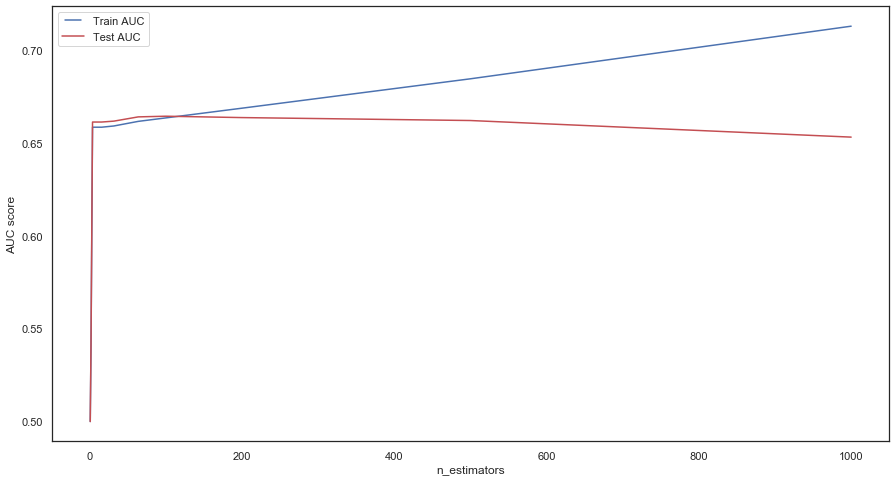

In [41]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 500, 1000]
train_results = []
test_results = []
for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator)
    model.fit(X_train_sc[selected_features_gb], y_train)
    train_pred = model.predict(X_train_sc[selected_features_gb])
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test_sc[selected_features_gb])
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
plt.figure(figsize=(15,8))
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

Esto demuestra que no por generar miles de árboles obtendremos mejores resultados. Con unos 50 estimadores nos servirá para que el algoritmo no cometa overfitting.

### Max. depth

In [44]:
#max_depths = np.linspace(1, 32, 32, endpoint=True)
#train_results = []
#test_results = []
#for max_depth in max_depths:
#    model = GradientBoostingClassifier(max_depth=max_depth)
#    model.fit(X_train_sc[selected_features_gb], y_train)
#    train_pred = model.predict(X_train_sc[selected_features_gb])
#    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, train_pred)
#    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
#    train_results.append(roc_auc)
#    y_pred = model.predict(X_test_sc[selected_features_gb])
#    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
#    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
#    test_results.append(roc_auc)
#
#plt.figure(figsize=(15,8))
#line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
#line2, = plt.plot(learning_rates, test_results, 'r', label='Test AUC')
#plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
#plt.ylabel('AUC score')
#plt.xlabel('Max. depth')
#plt.show()

### Min. samples splits

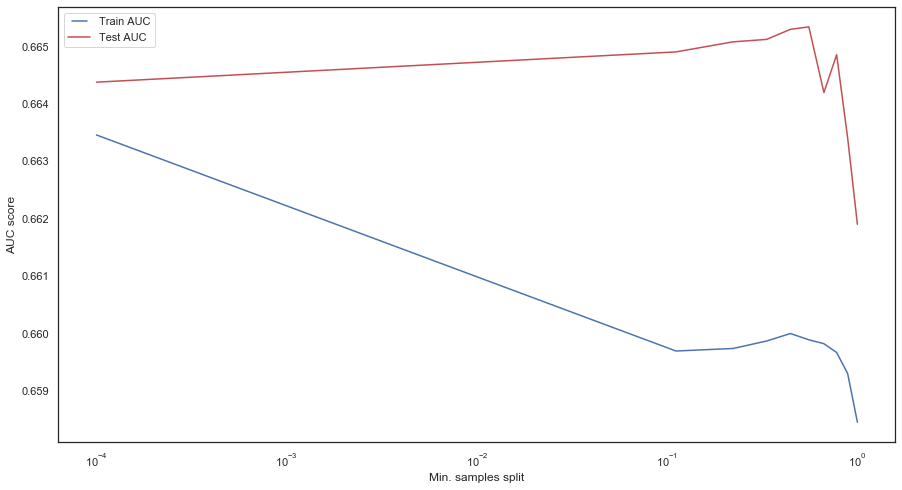

In [45]:
min_samples_splits = np.linspace(0.0001, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples in min_samples_splits:
    model = GradientBoostingClassifier(min_samples_split = min_samples)
    model.fit(X_train_sc[selected_features_gb], y_train)
    train_pred = model.predict(X_train_sc[selected_features_gb])
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test_sc[selected_features_gb])
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(15,8))
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.xscale("log")
plt.ylabel('AUC score')
plt.xlabel('Min. samples split')
plt.show()

Nuevamente el modelo produce overfitting para valores superiores a 0.5

### Min. samples leaf

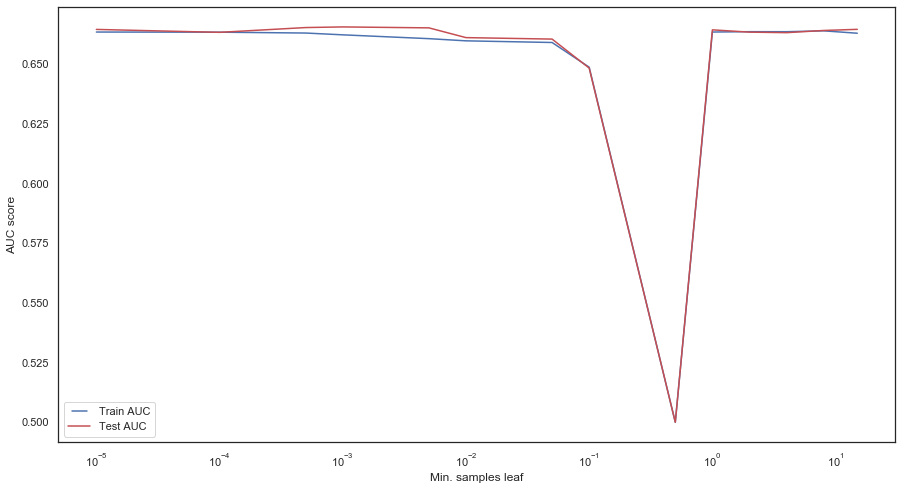

In [46]:
min_samples_leafs = [0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 4, 8, 15]
train_results = []
test_results = []
for min_samples in min_samples_leafs:
    model = GradientBoostingClassifier(min_samples_leaf = min_samples)
    model.fit(X_train_sc[selected_features_gb], y_train)
    train_pred = model.predict(X_train_sc[selected_features_gb])
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test_sc[selected_features_gb])
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(15,8))
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.xscale("log")
plt.ylabel('AUC score')
plt.xlabel('Min. samples leaf')
plt.show()

Elegiremos valores que ronden 0.01

### Max. features

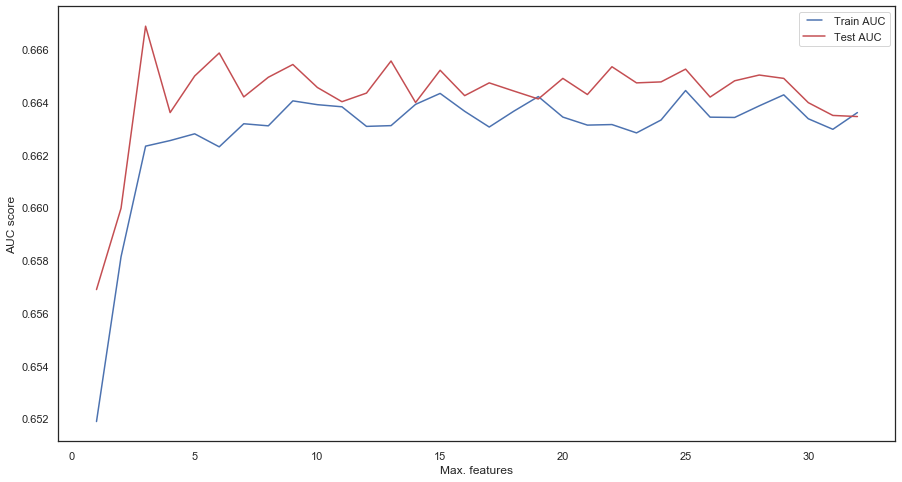

In [47]:
max_features = list(range(1,X_train_sc[selected_features_gb].shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    model = GradientBoostingClassifier(max_features = max_feature)
    model.fit(X_train_sc[selected_features_gb], y_train)
    train_pred = model.predict(X_train_sc[selected_features_gb])
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test_sc[selected_features_gb])
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(15,8))
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Max. features')
plt.show()

Gradient boosting permite elegir como numero maximo de caracteristicas para optimizar la division del nodo la raíz cuadrada del numero de caracteristicas. Como contamos con unas 35 carateristicas, la raiz será casi 6, y por tanto parece un valor bastante razonable para elegir.

Finalmente elegiremos el algoritmo Gradient Boosting que a priori mejor resultados nos habian dado. En este caso, aplicaremos un grid de hiperparametros para cada parametros y los iremos seleccionando de forma aleatoria.

In [48]:
classifiers = {}
classifiers.update({"Gradient Boosting": GradientBoostingClassifier()})

In [49]:
parameters = {}
parameters.update({"Gradient Boosting": { 
                                        "classifier__learning_rate":[0.1,0.05,0.01,0.005], 
                                        "classifier__n_estimators": [500],
                                        "classifier__max_depth": [2,3,4,5,6],
                                        "classifier__min_samples_split": [0.005, 0.01, 0.05, 0.10],
                                        "classifier__min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
                                        "classifier__subsample": [0.8, 0.9, 1]
                                         }})


In [50]:
results = {}
start_time = time.time()
# Tune and evaluate classifiers
for classifier_label, classifier in classifiers.items():
    
    # Print message to user
    print(f"Now tuning {classifier_label}.")

    # Initialize Pipeline object
    pipeline = Pipeline([("classifier", classifier)])

    # Define parameter grid
    param_grid = parameters[classifier_label]
    
    # Initialize GridSearch object
    rscv = RandomizedSearchCV(pipeline, param_grid, cv = 5,  n_jobs= -1, verbose = 1, scoring = 'neg_log_loss')

    # Fit gscv
    rscv.fit(X_train_sc[selected_features_gb], np.ravel(y_train))  

    # Get best parameters and score
    best_params = rscv.best_params_
    best_score = rscv.best_score_

    # Update classifier parameters and define new pipeline with tuned classifier
    tuned_params = {item[12:]: best_params[item] for item in best_params}
    classifier.set_params(**tuned_params)

    # Make predictions
    y_pred = rscv.predict_proba(X_test_sc[selected_features_gb])

    # Evaluate model
    log_loss = metrics.log_loss(y_test, y_pred)

    # Save results
    result = {"Classifier": rscv,
              "Best Parameters": best_params,
              "Training Log Loss": (-1) * best_score,
              "Test Log Loss": log_loss
             }

    results.update({classifier_label: result})

print("--- %s seconds ---" % (time.time() - start_time))

Now tuning Gradient Boosting.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.6min finished


--- 225.2560839653015 seconds ---


Veamos gráficamente los resultados obtenidos

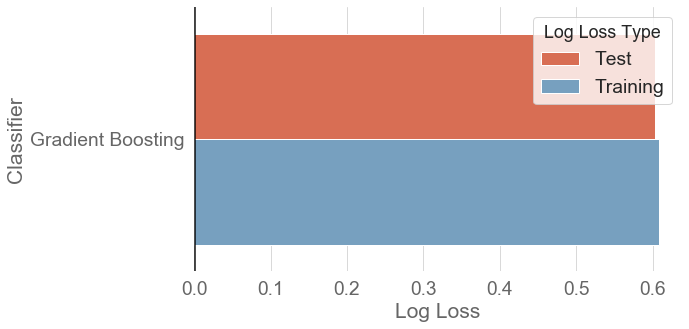

In [51]:
log_scores = {
              "Classifier": [],
              "Log Loss": [],
              "Log Loss Type": []
              }

# Get AUC scores into dictionary
for classifier_label in results:
    log_scores.update({"Classifier": [classifier_label] + log_scores["Classifier"],
                       "Log Loss": [results[classifier_label]["Training Log Loss"]] + log_scores["Log Loss"],
                       "Log Loss Type": ["Training"] + log_scores["Log Loss Type"]})
    
    log_scores.update({"Classifier": [classifier_label] + log_scores["Classifier"],
                       "Log Loss": [results[classifier_label]["Test Log Loss"]] + log_scores["Log Loss"],
                       "Log Loss Type": ["Test"] + log_scores["Log Loss Type"]})
    


# Dictionary to PandasDataFrame
log_scores = pd.DataFrame(log_scores)

# Set graph style
sns.set(font_scale = 1.75)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

    
# Colors
training_color = sns.color_palette("RdYlBu", 10)[1]
test_color = sns.color_palette("RdYlBu", 10)[-2]
colors = [training_color, test_color]

# Set figure size and create barplot
f, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x="Log Loss", y="Classifier", hue="Log Loss Type", palette = colors, data=log_scores)

# Generate a bolded horizontal line at y = 0
ax.axvline(x = 0, color = 'black', linewidth = 4, alpha = .7)

# Turn frame off
ax.set_frame_on(False)

# Tight layout
plt.tight_layout()


In [52]:
best_params

{'classifier__subsample': 0.9,
 'classifier__n_estimators': 500,
 'classifier__min_samples_split': 0.005,
 'classifier__min_samples_leaf': 0.005,
 'classifier__max_depth': 2,
 'classifier__learning_rate': 0.1}

In [53]:
log_scores

,Classifier,Log Loss,Log Loss Type
0,Gradient Boosting,0.603792,Test
1,Gradient Boosting,0.607889,Training


A pesar de que los resultados son muy parejos, Gradient Boost se ejecuto 4 veces mas rápido que XGBoost. Finalmente, vamos a ejecutar un grid search para este modelo en busca de los mejores hiperparametros.

# 5. Predictions

<a id='prediction'></a>

Una vez hemos entrenado y validado el modelo, se le ha asignado los mejores hiperparametros posible. En este momento vamos a realizar las predicciones sobre el conjunto de datos 'submit'

In [54]:
train = pd.DataFrame(sc.fit_transform(data.loc[:, data.columns != 'shot_made_flag'].values), 
                          index=data.loc[:, data.columns != 'shot_made_flag'].index, 
                          columns=data.loc[:, data.columns != 'shot_made_flag'].columns)

object_variable = data.shot_made_flag

submit_ = pd.DataFrame(sc.transform(submit.loc[:, submit.columns != 'shot_made_flag'].values), 
                          index=submit.loc[:, submit.columns != 'shot_made_flag'].index, 
                          columns=submit.loc[:, submit.columns != 'shot_made_flag'].columns)

model = classifiers["Gradient Boosting"]
model.fit(train[selected_features_gb], object_variable)
y_pred = model.predict_proba(submit_[selected_features_gb])

Exportamos los resultados en el formato que Kaggle necesita para poder evaluarlo.

In [55]:
predictions = pd.DataFrame({'shot_made_flag' : y_pred[:,1]},
                           index = df[df.shot_made_flag.isnull()].index)
predictions.index.name = 'shot_id'
predictions.to_csv('./../output/submission_{}.csv'.format(datetime.now().strftime('%Y_%m_%d')))

# 6. Anexo

<a id='anexo'></a>

In [ ]:
start_time = time.time()
# Tune and evaluate classifiers
for classifier_label, classifier in classifiers.items():
    for m in metrics.SCORERS.items():
        try:
            print(m[0])
            # Initialize Pipeline object
            pipeline = Pipeline([("classifier", classifier)])
            param_grid = parameters[classifier_label]

            # Initialize GridSearch object
            rscv = RandomizedSearchCV(pipeline, param_grid, cv = 5,  n_jobs= -1, verbose = 1, scoring = m[0])

            # Fit gscv
            rscv.fit(X_train, np.ravel(y_train))  

            # Get best parameters and score
            best_params = rscv.best_params_
            best_score = rscv.best_score_

            # Update classifier parameters and define new pipeline with tuned classifier
            tuned_params = {item[12:]: best_params[item] for item in best_params}
            classifier.set_params(**tuned_params)

            train = pd.DataFrame(sc.fit_transform(data.loc[:, data.columns != 'shot_made_flag'].values), 
                                      index=data.loc[:, data.columns != 'shot_made_flag'].index, 
                                      columns=data.loc[:, data.columns != 'shot_made_flag'].columns)

            test = data.shot_made_flag

            submit_ = pd.DataFrame(sc.transform(submit.loc[:, submit.columns != 'shot_made_flag'].values), 
                                      index=submit.loc[:, submit.columns != 'shot_made_flag'].index, 
                                      columns=submit.loc[:, submit.columns != 'shot_made_flag'].columns)

            model = classifiers["Gradient Boosting"]
            model.fit(train, test)
            y_pred = model.predict_proba(submit_)
            predictions = pd.DataFrame({'shot_made_flag' : y_pred[:,1]},
                                       index = df[df.shot_made_flag.isnull()].index)
            predictions.index.name = 'shot_id'
            predictions.to_csv('./../output/submission_{}_{}.csv'.format(m[0], datetime.now().strftime('%Y_%m_%d')))
        except:
            print("Error for".format(m[0]))